In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#kagglehub  #for data
#python-dotenv
#langchain-community #for LLM
#langchain-openai
#langchain-chroma
#transformers #for hugging face
#gradio #for webapp
#pip install langchain-chroma langchain-community langchain-openai python-dotenv
#pip install python-dotenv

In [55]:
!pip install langchain-chroma langchain-community langchain-openai

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access


  Using cached tenacity-9.1.2-py3-none-any.whl (28 kB)
  Using cached uvicorn-0.34.2-py3-none-any.whl (62 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
  Using cached referencing-0.36.2-py3-none-any.whl (26 kB)
  Using cached jsonschema_specifications-2025.4.1-py3-none-any.whl (18 kB)
  Using cached pydantic-2.11.5-py3-none-any.whl (444 kB)
  Using cached packaging-24.2-py3-none-any.whl (65 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl (14

In [2]:
books = pd.read_csv('books.csv')

In [3]:
books.sample(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
4939,9780794503291,0794503292,Gulliver's Travels,NaN,NaN,Juvenile Fiction,http://books.google.com/books/content?id=JPlli...,This new edition of Swift's satiric classic is...,2003.0,3.34,64.0,13.0
3581,9780571084838,0571084834,Lord of the Flies,NaN,William Golding,Airplane crash survival,NaN,After a plane crash strands them on a tropical...,1954.0,3.67,223.0,4498.0
1556,9780312423797,0312423799,Dry,A Memoir,Augusten Burroughs,Biography & Autobiography,NaN,From the bestselling author of Running with Sc...,2004.0,4.02,293.0,75017.0


In [22]:
books.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

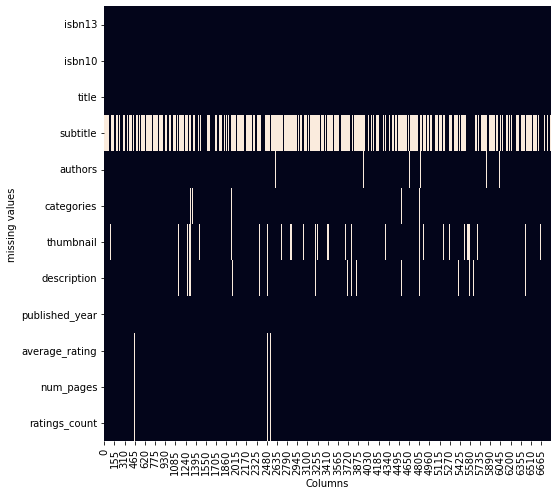

In [4]:
#check missing values
plt.figure(figsize=(8,8))
ax = plt.axes()
sns.heatmap(books.isna().transpose(),cbar=False, ax=ax)

plt.xlabel('Columns')
plt.ylabel('missing values')
plt.show()
    

In [5]:
books['missing_description'] = np.where(books['description'].isna(),1,0)
books['age_of_book'] = 2024 - books['published_year']


In [6]:
columns_of_intrest = ['num_pages', 'age_of_book','missing_description','average_rating']

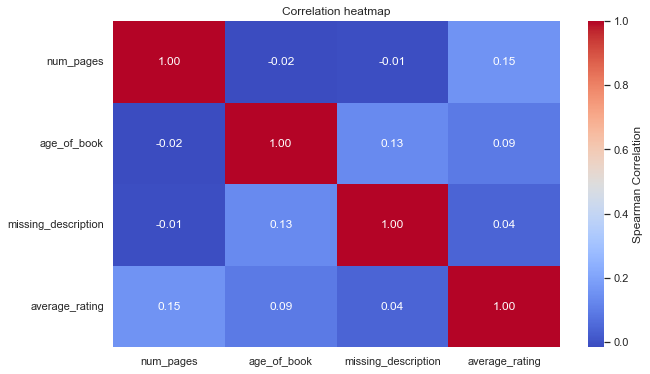

In [7]:
correlation_matrix = books[columns_of_intrest].corr(method='spearman')

sns.set_theme(style='white')
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                      cbar_kws={'label':'Spearman Correlation'})

heatmap.set_title('Correlation heatmap')
plt.show()


# since in desription we have lots of missing info, here we can see vary weak relationship between each other


In [13]:
#Removing missing rows
book_missing = books[~(books['description'].isna())&
    ~(books['average_rating'].isna())&
    ~(books['age_of_book'].isna())&
    ~(books['published_year'].isna())
     ]

In [17]:
book_missing.sample()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
2525,9780399504334,0399504338,Amphigorey,Fifteen Books,NaN,Comics & Graphic Novels,http://books.google.com/books/content?id=uQe2a...,Fifteen works by the American artist and autho...,1980.0,4.05,220.0,35332.0,0,44.0


In [26]:
book_missing['categories'].value_counts().reset_index().sort_values(by="categories", ascending=False)

,index,categories
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


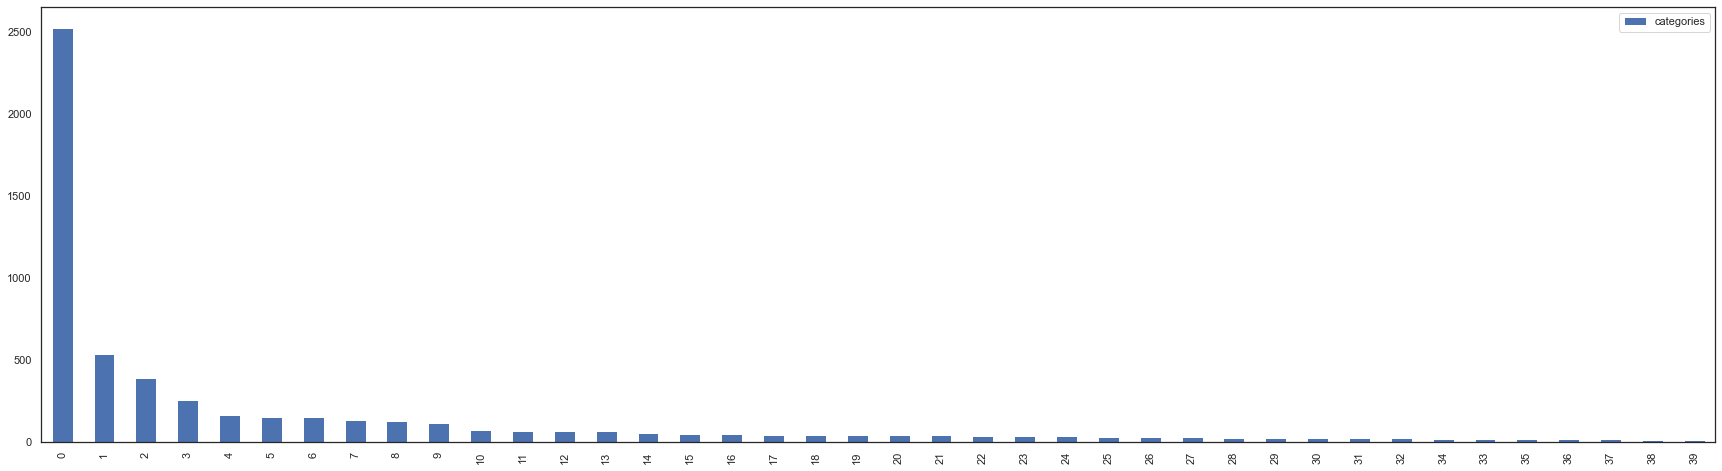

In [36]:
plt.figure(figsize=(30,8))
ax = plt.axes()
book_missing['categories'].value_counts().reset_index().sort_values(by="categories", ascending=False)[:40].plot(kind='bar',ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#in categories we can see uneven distribution

In [38]:
book_missing.sample()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
3104,9780452286535,0452286530,The Jane Austen Book Club,NaN,Karen Joy Fowler,Fiction,http://books.google.com/books/content?id=ucmLD...,As six Californians get together to form a boo...,2005.0,3.08,288.0,56434.0,0,19.0


In [39]:
#discription having very few words or even single word,that gona help for classification

book_missing['words_in_description'] = book_missing['description'].str.split().str.len()

C:\Users\acer\AppData\Local\Temp\ipykernel_13396\3692366980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing['words_in_description'] = book_missing['description'].str.split().str.len()


In [42]:
book_missing.head(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0,14


<AxesSubplot:ylabel='Frequency'>

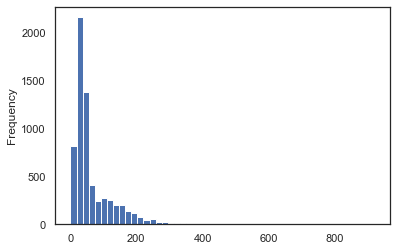

In [44]:
book_missing['words_in_description'].plot(kind='hist', bins=50)

In [45]:
#filter very small description, not veru helpfull, we can skip
book_missing.loc[book_missing['words_in_description'].between(1,4),'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [46]:
book_missing.loc[book_missing['words_in_description'].between(5,14),'description']

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [47]:
#lets remove words len<25, making no desicion for classification
book_missing_25_words = book_missing[book_missing['words_in_description']>=25]

In [48]:
book_missing_25_words.shape

(5197, 15)

In [49]:
#subtilte has book info for what is written, lets combine both columns
book_missing_25_words['title_and_subtitle'] = (
np.where(book_missing_25_words['subtitle'].isna(),book_missing_25_words['title'],
        book_missing_25_words[['title','subtitle']].astype(str).agg(": ".join, axis=1)))

C:\Users\acer\AppData\Local\Temp\ipykernel_13396\2549450625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['title_and_subtitle'] = (


In [50]:
book_missing_25_words.sample(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
6471,9781599982939,1599982935,Naughty Little Secret,NaN,Shelley Bradley,Fiction,http://books.google.com/books/content?id=HMuDm...,"By night, he becomes a mysterious stranger dev...",2006.0,3.73,212.0,2270.0,0,18.0,206,Naughty Little Secret
4384,9780743292542,0743292545,You On A Diet,The Owner's Manual for Waist Management,M. D. Roizen (Michael F.);Michael F. Roizen,Reducing diets,http://books.google.com/books/content?id=4wRJw...,The only way that dieting can work is to make ...,2006.0,3.65,370.0,4382.0,0,18.0,36,You On A Diet: The Owner's Manual for Waist Ma...
6568,9781853260735,1853260738,Moll Flanders,NaN,Daniel Defoe,Fiction,http://books.google.com/books/content?id=kzuSu...,"With an Introduction and Notes by R.T.Jones, H...",1993.0,3.52,339.0,34477.0,0,31.0,164,Moll Flanders


In [51]:
#combine booking id (description and isbn13)
book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13','description']].astype(str).agg(" ".join, axis=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_13396\351291716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13','description']].astype(str).agg(" ".join, axis=1)


In [52]:
book_missing_25_words.sample(3)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0,174,I Am that: Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...
3472,9780553381009,0553381008,Stories,NaN,Anton Pavlovich Chekhov,Fiction,http://books.google.com/books/content?id=ccCMJ...,An anthology of short fiction by the great Rus...,2000.0,4.35,467.0,26267.0,0,24.0,46,Stories,9780553381009 An anthology of short fiction by...
4786,9780767915748,0767915747,Holy Cow,An Indian Adventure,Sarah MacDonald,Travel,http://books.google.com/books/content?id=LnyJD...,A popular Australian radio correspondent humor...,2003.0,3.53,304.0,14943.0,0,21.0,44,Holy Cow: An Indian Adventure,9780767915748 A popular Australian radio corre...


In [54]:
#keep only relevent columns and save file
(
    book_missing_25_words
    .drop(['subtitle','missing_description','age_of_book','words_in_description'], axis=1)
    .to_csv('books_cleaned.csv', index=False)
)